# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston

# Problem Statement 

* You have been given Dataset that describe the functionality of houses.Now based on the givea features, you have to predict the house price.


# Defining the DataFrame

In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# EDA - Explotory Data Analysis

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
df.shape[0]

506

In [ ]:
df.shape[1]

13

In [ ]:
print(df.columns)

RangeIndex(start=0, stop=13, step=1)


In [ ]:
len(df.columns)

13

In [ ]:
df.info

<bound method DataFrame.info of           0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

       

In [ ]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [ ]:
df.nunique()

0     504
1      26
2      76
3       2
4      81
5     446
6     356
7     412
8       9
9      66
10     46
11    357
12    455
dtype: int64

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.iloc[:,4].unique()

array([0.538 , 0.469 , 0.458 , 0.524 , 0.499 , 0.428 , 0.448 , 0.439 ,
       0.41  , 0.403 , 0.411 , 0.453 , 0.4161, 0.398 , 0.409 , 0.413 ,
       0.437 , 0.426 , 0.449 , 0.489 , 0.464 , 0.445 , 0.52  , 0.547 ,
       0.581 , 0.624 , 0.871 , 0.605 , 0.51  , 0.488 , 0.401 , 0.422 ,
       0.404 , 0.415 , 0.55  , 0.507 , 0.504 , 0.431 , 0.392 , 0.394 ,
       0.647 , 0.575 , 0.447 , 0.4429, 0.4   , 0.389 , 0.385 , 0.405 ,
       0.433 , 0.472 , 0.544 , 0.493 , 0.46  , 0.4379, 0.515 , 0.442 ,
       0.518 , 0.484 , 0.429 , 0.435 , 0.77  , 0.718 , 0.631 , 0.668 ,
       0.671 , 0.7   , 0.693 , 0.659 , 0.597 , 0.679 , 0.614 , 0.584 ,
       0.713 , 0.74  , 0.655 , 0.58  , 0.532 , 0.583 , 0.609 , 0.585 ,
       0.573 ])

In [ ]:
df.iloc[:,4].value_counts()

0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.394     1
0.518     1
0.385     1
0.389     1
0.435     1
Name: 4, Length: 81, dtype: int64

In [ ]:
newdf = df.copy()

In [ ]:
newdf.iloc[:,4].replace([0.538,0.573],[0,0])

0      0.000
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.000
502    0.000
503    0.000
504    0.000
505    0.000
Name: 4, Length: 506, dtype: float64

In [ ]:
newdf.iloc[:,4]

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: 4, Length: 506, dtype: float64

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Observation

1.   Data Strengh = 506
2.   Number of Random Variable = 13
3.   None of the columns contains Null Values
4.   All the columns have numerical values


df

In [ ]:
df.columns = ['Price','area','bedrooms','bathrooms','stories','mainroad','questroom','basement','hotwaterheating','airconditioning','parking','preface','furneshingstatus']


In [ ]:
df

,Price,area,bedrooms,bathrooms,stories,mainroad,questroom,basement,hotwaterheating,airconditioning,parking,preface,furneshingstatus
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# Manipulation

1.   Changed all the categorical data to Numerical data.
2.   Changed all the Numerical columns name to String data.



In [ ]:
df.dtypes

Price               float64
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad            float64
questroom           float64
basement            float64
hotwaterheating     float64
airconditioning     float64
parking             float64
preface             float64
furneshingstatus    float64
dtype: object

In [ ]:
df.describe()

,Price,area,bedrooms,bathrooms,stories,mainroad,questroom,basement,hotwaterheating,airconditioning,parking,preface,furneshingstatus
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df.corr()

,Price,area,bedrooms,bathrooms,stories,mainroad,questroom,basement,hotwaterheating,airconditioning,parking,preface,furneshingstatus
Price,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
area,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
bedrooms,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
bathrooms,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
stories,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
mainroad,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
questroom,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
basement,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
hotwaterheating,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
airconditioning,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


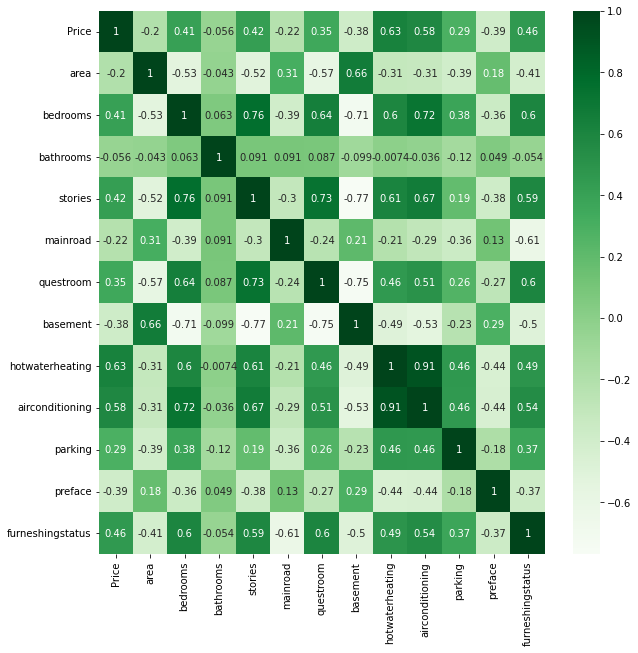

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True,cmap = 'Greens')

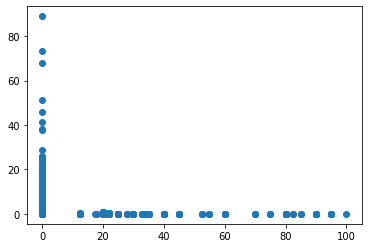

In [ ]:
plt.scatter(df.area,df.Price)

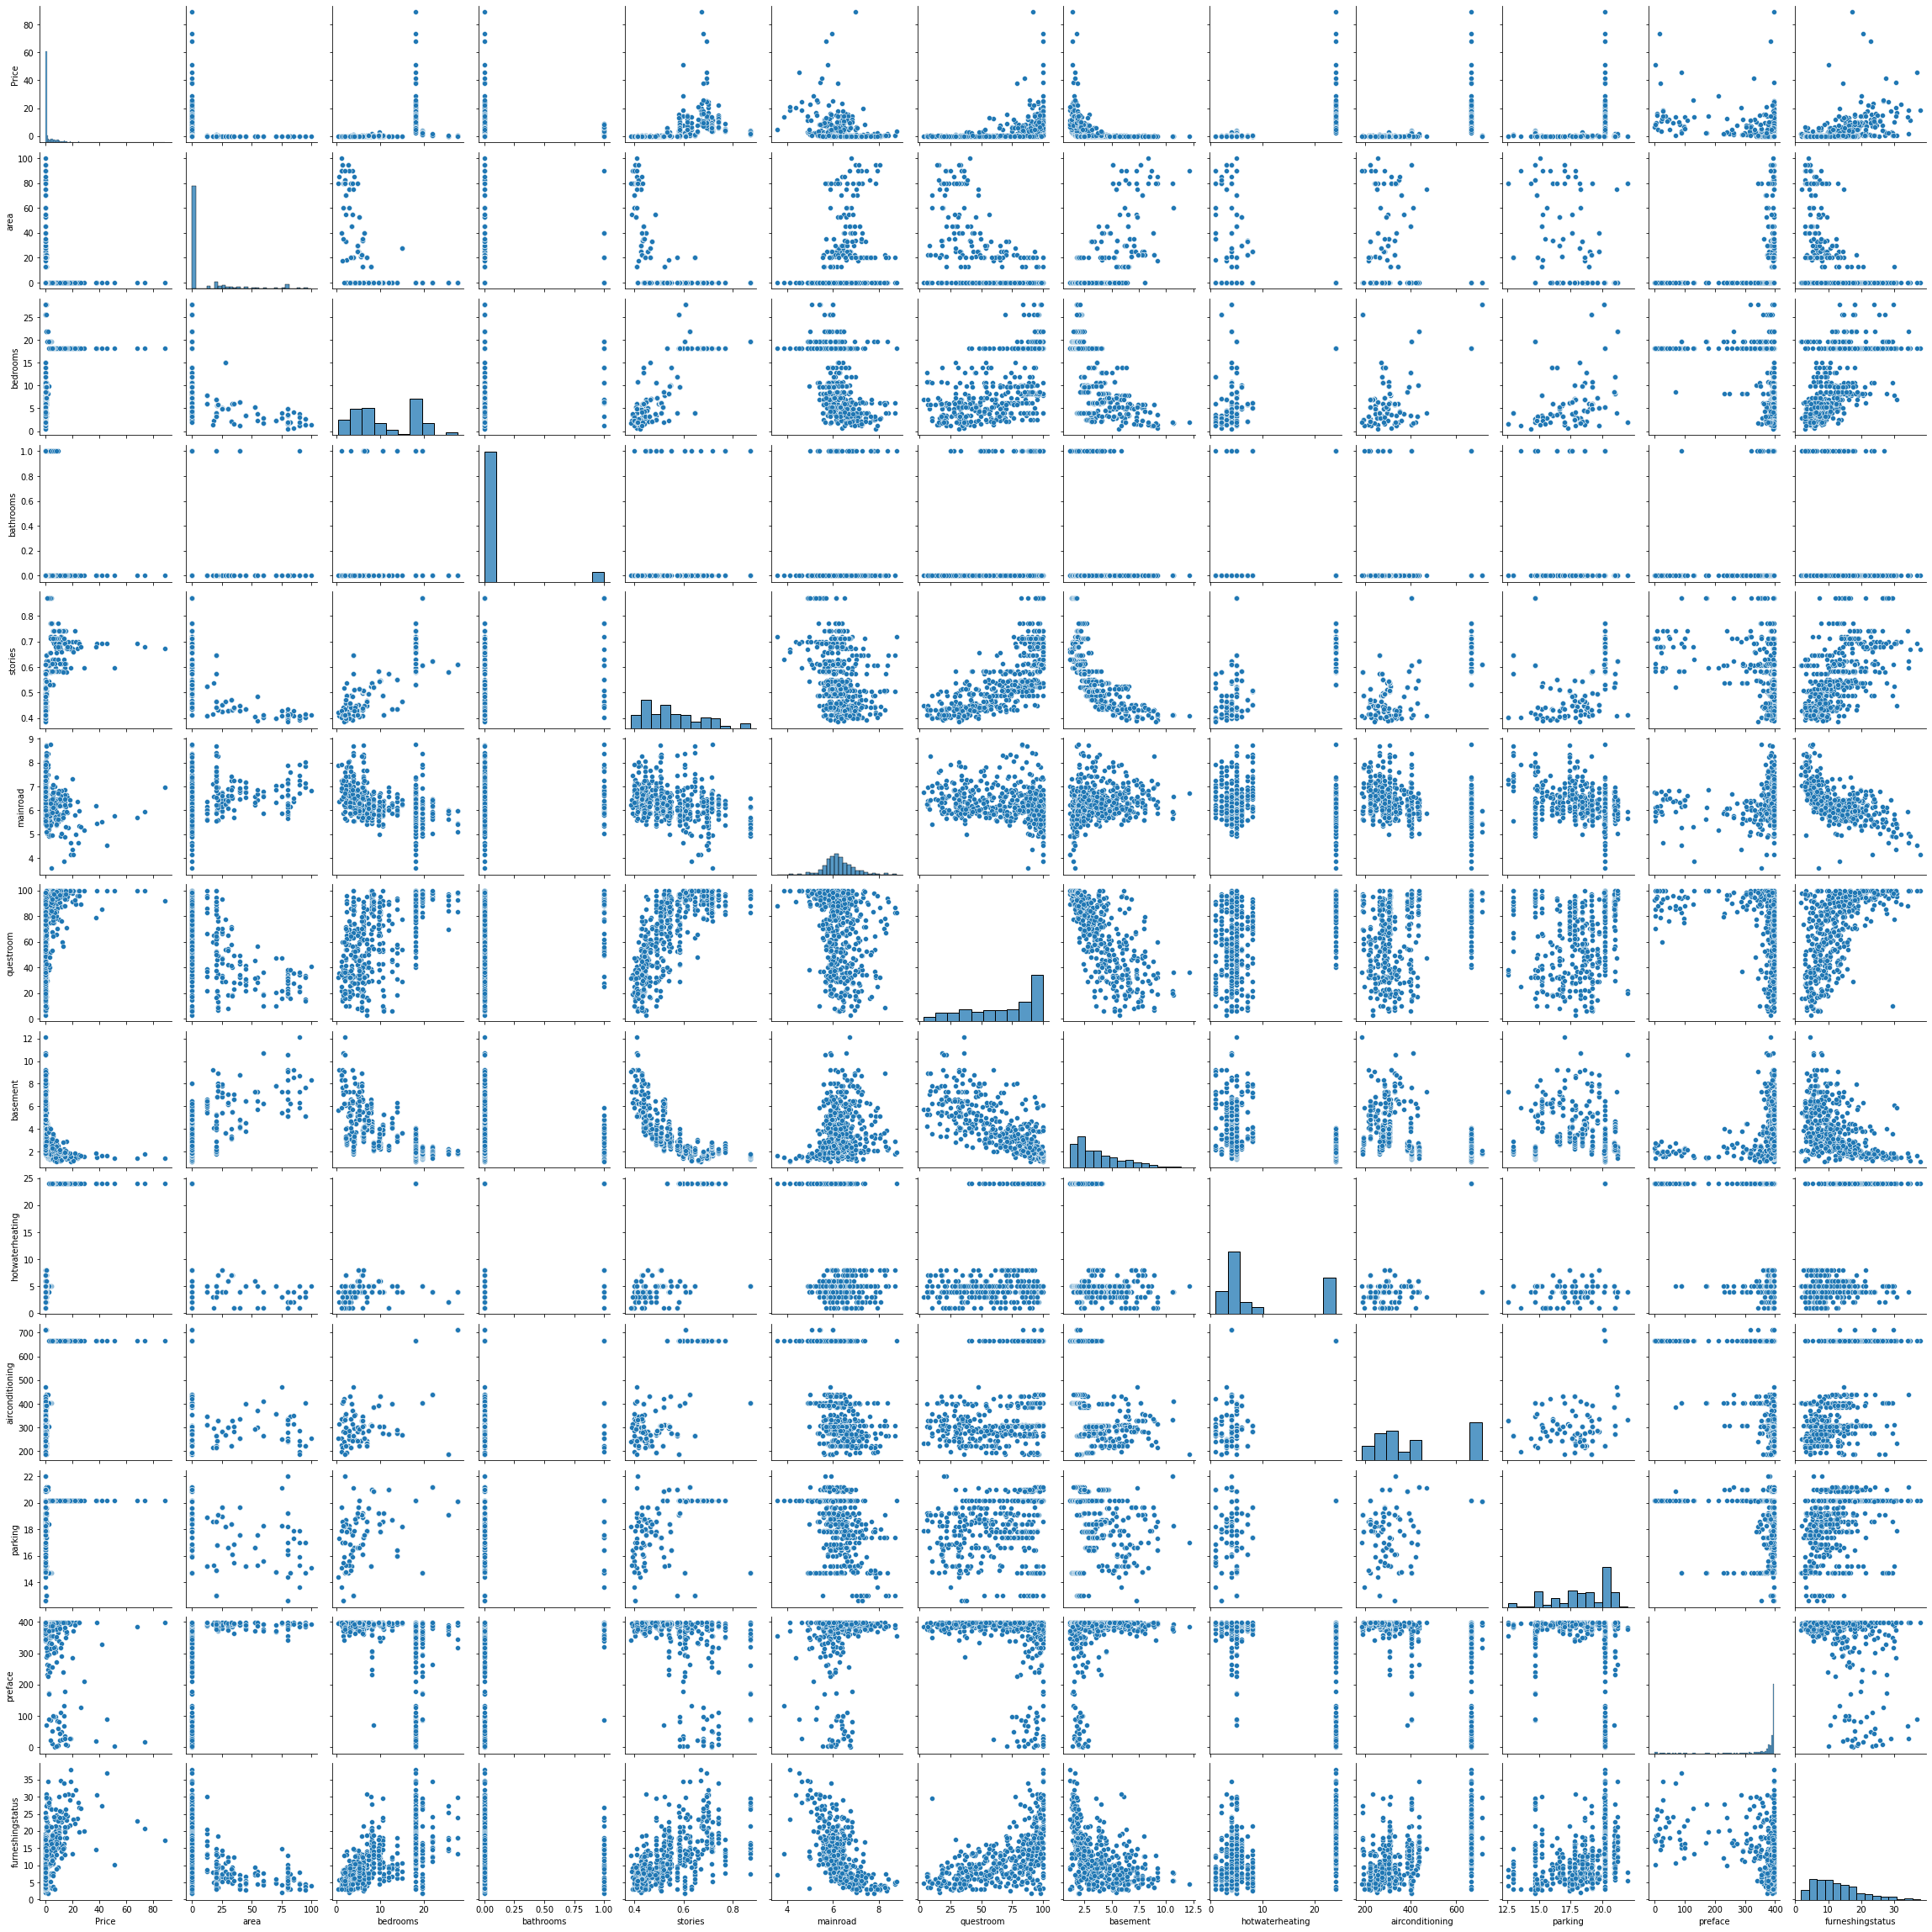

In [ ]:
sns.pairplot(df)

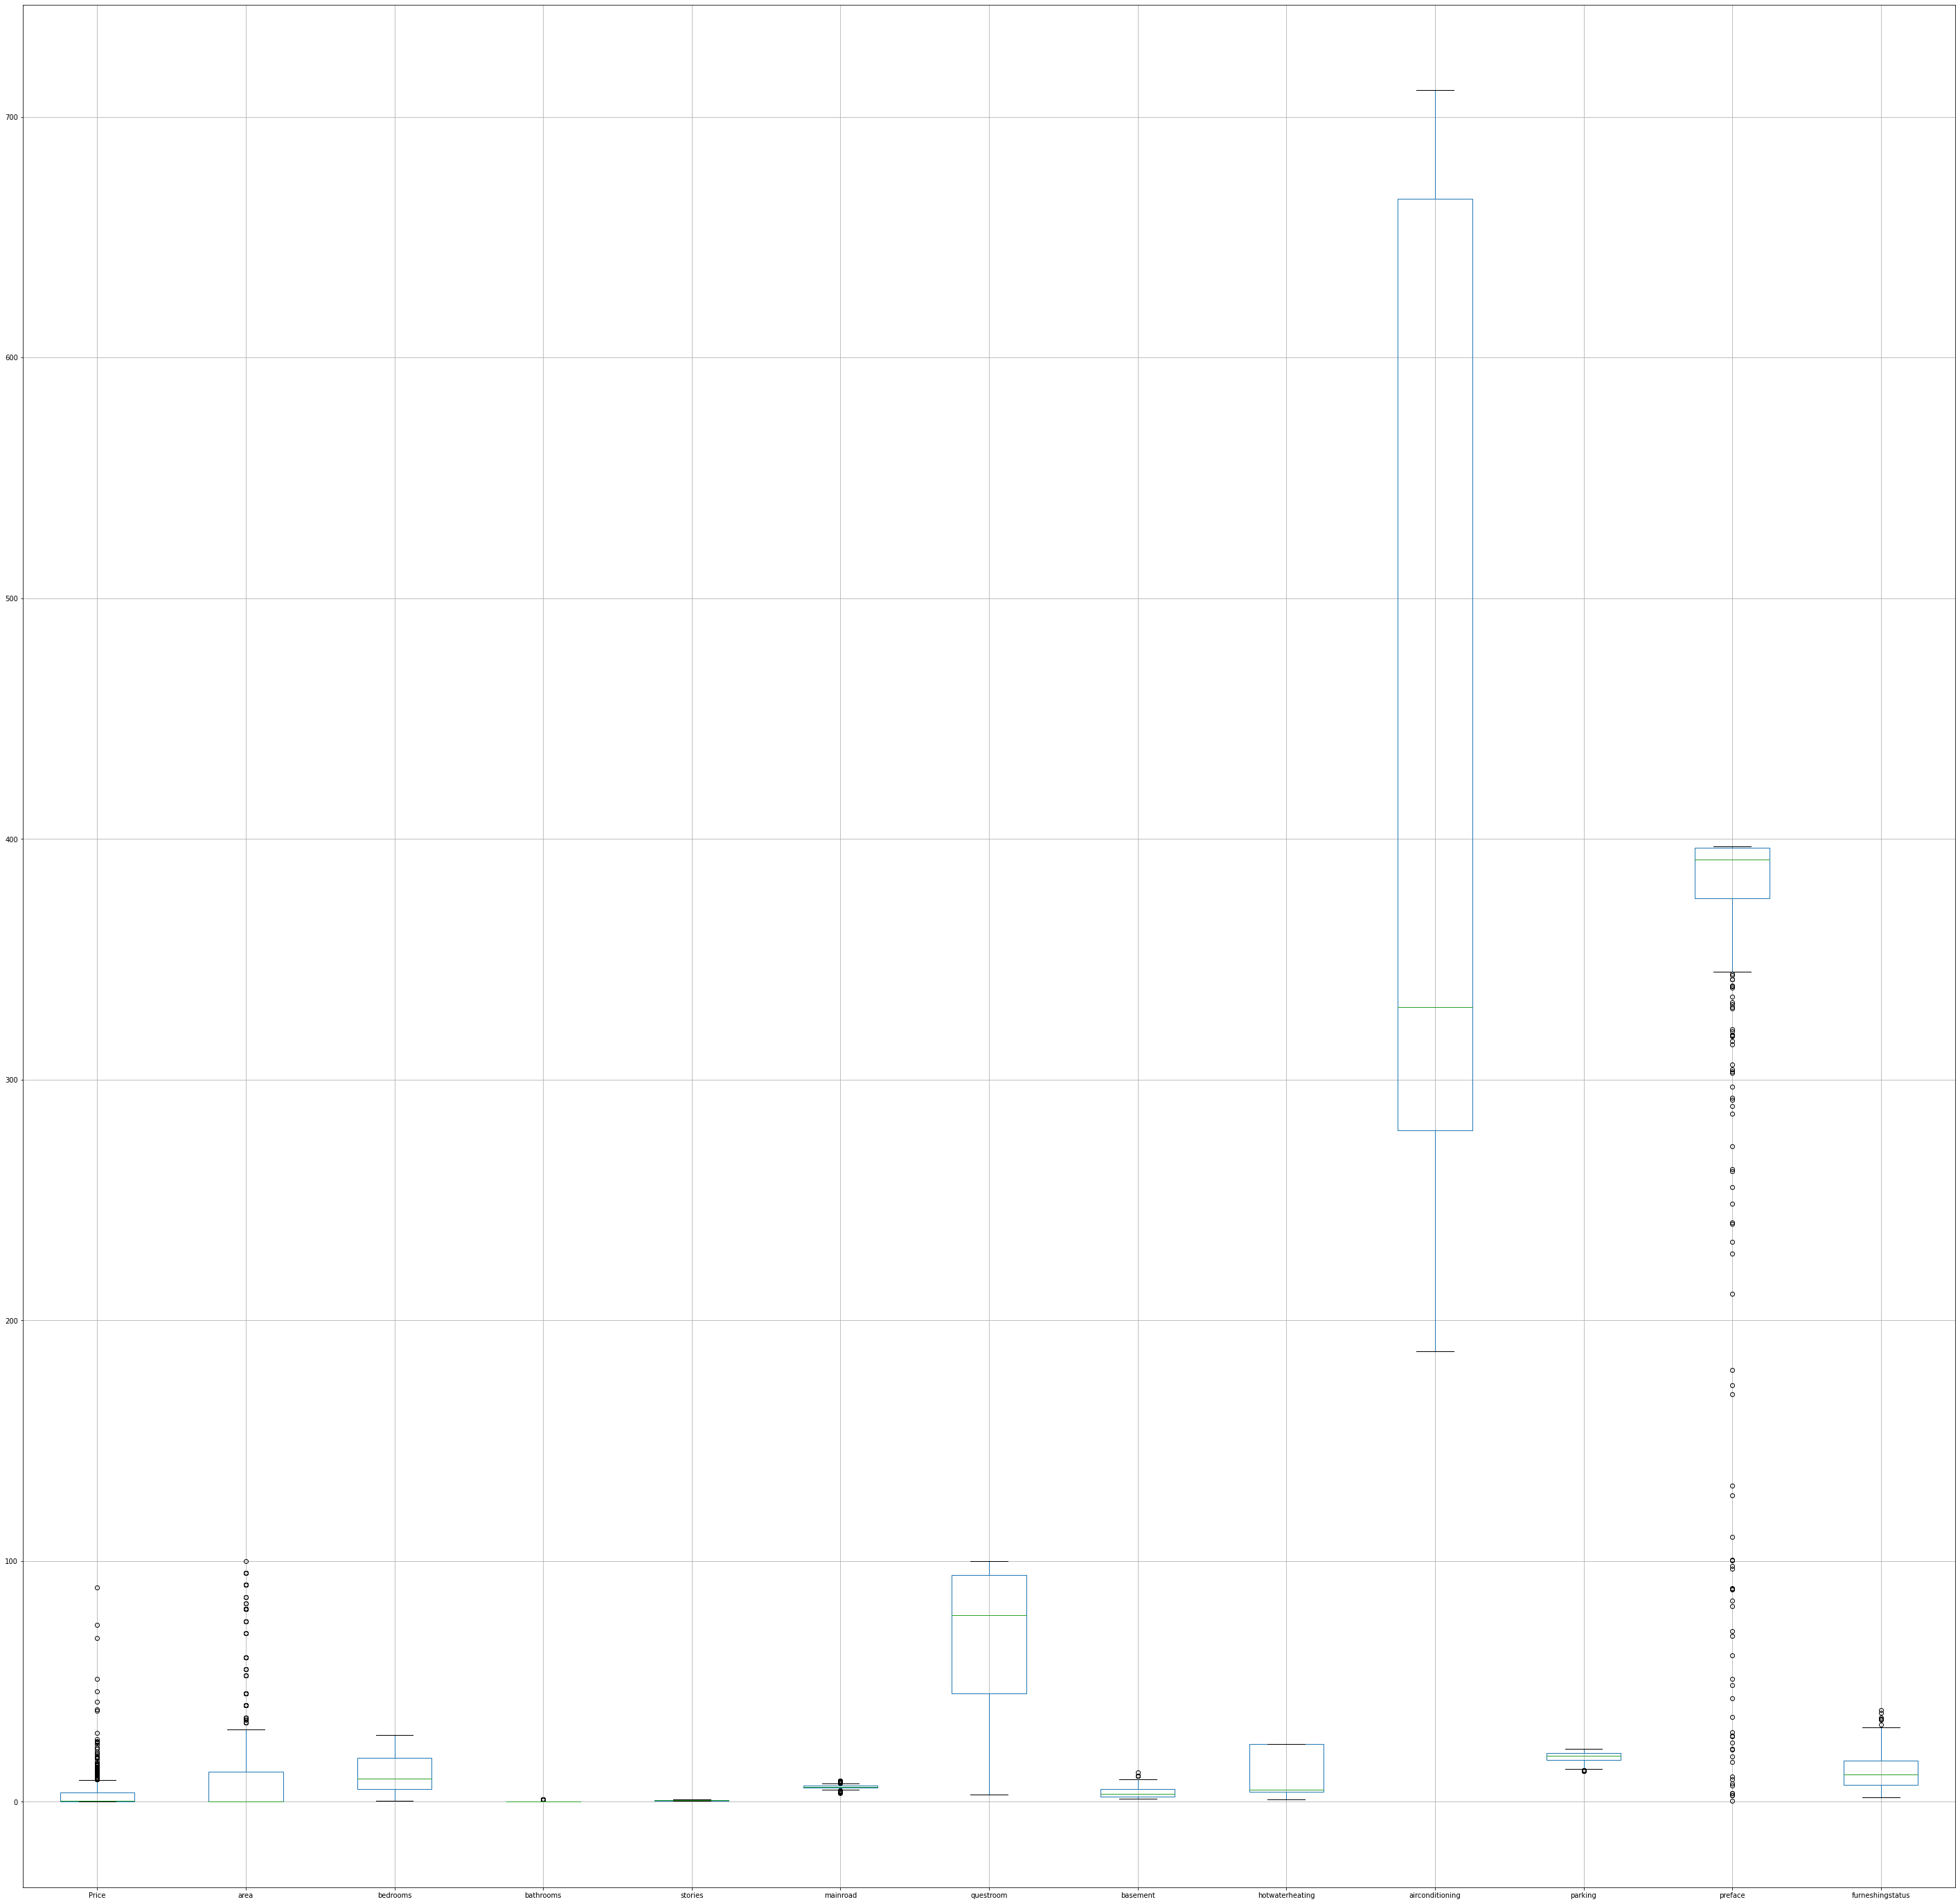

In [ ]:
plt.figure(figsize = (50,50))
df.boxplot()


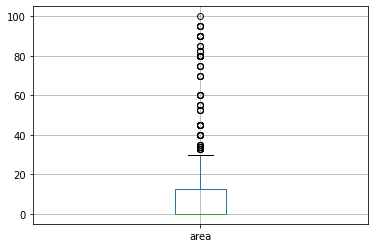

In [ ]:
df[['area']].boxplot()

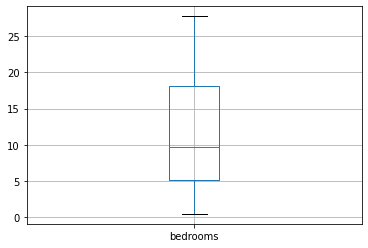

In [ ]:
df[['bedrooms']].boxplot()

In [ ]:
df.bedrooms.loc[df.bedrooms >10].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 18.10    132
19.58     30
21.89     15
10.59     11
10.01      9
25.65      7
12.83      6
13.92      5
27.74      5
11.93      5
10.81      4
13.89      4
15.04      3
Name: bedrooms, dtype: int64>

In [ ]:
len(df.bedrooms.loc[df.bedrooms >10].value_counts())

13

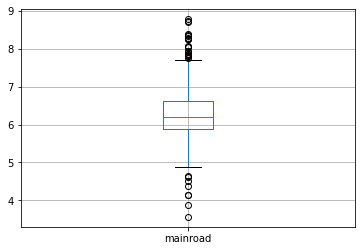

In [ ]:
df[['mainroad']].boxplot()

In [ ]:
len(df.mainroad.loc[df.mainroad == 7.9])

0

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


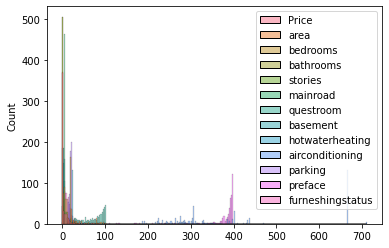

In [ ]:
sns.histplot(df)

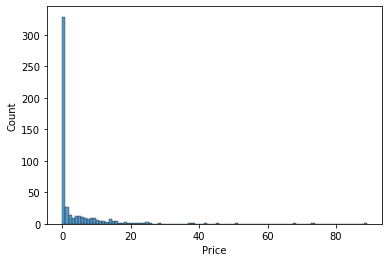

In [ ]:
sns.histplot(df.Price)

In [ ]:
df.head()

,Price,area,bedrooms,bathrooms,stories,mainroad,questroom,basement,hotwaterheating,airconditioning,parking,preface,furneshingstatus
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


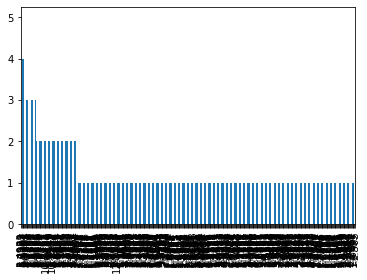

In [ ]:
df.basement.value_counts().plot.bar()

In [ ]:
df.loc[df.bedrooms == 2.18,['Price','bedrooms','bathrooms']][df.bathrooms == 0.0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Price,bedrooms,bathrooms
3,0.03237,2.18,0.0
4,0.06905,2.18,0.0
5,0.02985,2.18,0.0
304,0.05515,2.18,0.0
305,0.05479,2.18,0.0
306,0.07503,2.18,0.0
307,0.04932,2.18,0.0


# Splitting the dataset

In [ ]:
x = df[df.columns[1:]]
y = df.Price

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [ ]:
df['Price']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: Price, Length: 506, dtype: float64

In [ ]:
df.drop('Price',axis=1)

,area,bedrooms,bathrooms,stories,mainroad,questroom,basement,hotwaterheating,airconditioning,parking,preface,furneshingstatus
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
df.Price.ndim

1

In [ ]:
df.drop('Price',axis = 1).ndim

2

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [ ]:
len(x_train)

404

In [ ]:
len(x_test)

102

In [ ]:
len(y_test)

102

In [ ]:
len(y_train)

404

# Choosing the Model

In [ ]:
model = LinearRegression()

# Fitting/Training the Model

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Intercept Value
model.intercept_

9.971813687637255

In [ ]:
#Cofficient Value
model.coef_

array([ 4.53861800e-02, -5.51198108e-02, -1.48662522e+00, -9.13908765e+00,
       -2.01092168e-01, -5.15828023e-03, -8.73992712e-01,  5.71579773e-01,
       -1.72838104e-03, -8.50892460e-02, -7.82635139e-03,  2.80789602e-01])

# Prediction

In [ ]:
y_test

307     0.04932
343     0.02543
47      0.22927
67      0.05789
362     3.67822
         ...   
92      0.04203
224     0.31533
110     0.10793
426    12.24720
443     9.96654
Name: Price, Length: 102, dtype: float64

In [ ]:
pred_y = model.predict(x_test)

In [ ]:
pred_y

array([ 3.57396564,  0.81974612,  0.86456398, -1.24957678,  9.2530935 ,
       -0.9276236 ,  2.09038114, -0.09756296,  1.39817564, -0.45285116,
        9.40155923, -0.36270777,  2.44644303,  2.77997622,  0.68460209,
       11.83961287, 14.38049342,  1.18348171,  1.18977213,  4.30807271,
       -0.21965922,  2.22028013, -0.76064254, -1.25734323,  1.1834339 ,
       17.0583508 ,  3.33130741, -3.32778018,  1.19864747, 13.06859061,
       -3.36472316,  2.2099993 ,  2.48022935, 10.95836429, -1.17291917,
        2.42795304, 11.98232273, -3.21895323, 15.07805564, 10.88684457,
       -1.10093897, -2.53328084,  1.9783393 , 15.21287685, 12.66216428,
       15.93145471, -3.58178593, 11.74353737,  1.44668027,  3.49304515,
       10.58632552,  1.18140586, -3.1099199 ,  1.46380617,  4.94330942,
       -0.09036494, 16.36802855, -0.58849044,  0.32013614,  0.4880648 ,
       11.55340555, -1.40330606, 12.91214723, 15.27024165,  6.43615175,
       -0.62557417, -0.17803217, -4.10057715, -0.78579113,  0.68

In [ ]:
newdf = pd.DataFrame({'Actual Value':y_test,'predicted Value':pred_y})

In [ ]:
newdf

,Actual Value,predicted Value
307,0.04932,3.573966
343,0.02543,0.819746
47,0.22927,0.864564
67,0.05789,-1.249577
362,3.67822,9.253094
...,...,...
92,0.04203,0.867987
224,0.31533,1.138570
110,0.10793,1.780018
426,12.24720,15.469985


Text(0.5, 1.0, 'Actual V/s Predicted')

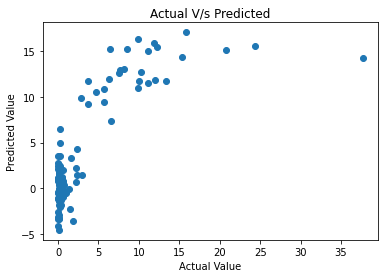

In [ ]:
plt.scatter(newdf['Actual Value'],newdf['predicted Value'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual V/s Predicted')

In [ ]:
newdf.corr()

,Actual Value,predicted Value
Actual Value,1.000000,0.791983
predicted Value,0.791983,1.000000


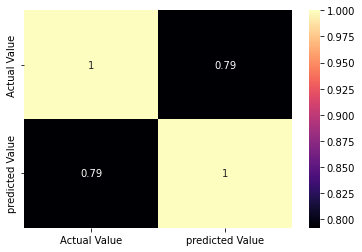

In [ ]:
sns.heatmap(newdf.corr(),annot = True, cmap = 'magma')

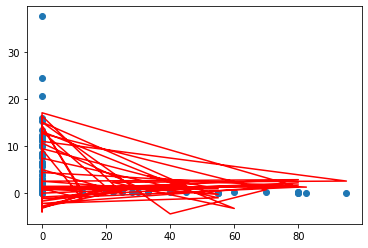

In [ ]:
# Simple linear Regression
plt.scatter(x_test.area,y_test)
plt.plot(x_test.area,pred_y,color = 'red')

# Testing the Model Performance

In [ ]:
# Accuracy
r2_score(y_test,pred_y)

0.5745037705245251